In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure

In [2]:
#Opción cargar local
base = pd.ExcelFile('Base Avatares corregida.xlsx')
fiscal_ferreres = pd.ExcelFile('C7.2 - Sector Publico - Valores (descargada).xlsx')

In [3]:
#Opción cargar online
link ='https://rdu.unc.edu.ar/bitstream/handle/11086/19108/G%c3%b3mez%2c%20M.%20%282020%29.%20La%20primera%20caja%20de%20conversi%c3%b3n%20Argentina%20en%20cifras%2c%201901-%201935..xlsx?sequence=4&isAllowed=y'
base = pd.ExcelFile(link)

link2 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRyoQVpVH1TskB7s96_m15ZW9my8145eDQmwleV_Ksw-fvcDoSsNP1uiydoLQWAgA/pub?output=xls'
fiscal_ferreres = pd.ExcelFile(link2)

## Acomodar las tablas 



In [4]:
caja = pd.read_excel(base, sheet_name="Caja de Conversión")
caja = caja.drop(caja.columns[[3,5,7,9,11]], axis=1)

new_header = ['Año',
              'Mes',
              'Emisión por Canje de Oro. Ley 3.871 - Articulo 7º',
              'Emisión por Oro depositado en las Legaciones - Ley 9.480',
              'Emisión por Redescuento - Leyes 9.479 y 9.577',
              'Emisión por caución de titulos del emprestito patriótico - Ley 11.580',
              'Emisión Sin Garantía',
              'Billetes en circulación - Total',
              'Billetes en circulación - En mano del público',
              'Billetes en circulación - En mano de los bancos']

#eliminar titulos Carga
caja= caja[5:] 
caja.columns = new_header
caja= caja.replace('…', '0') 
caja['Año'] = caja['Año'].fillna(0)
caja['Año'] = pd.to_numeric(caja['Año'])


for j in range (len(caja)):
    if caja['Año'].iloc[j] == 0:
        caja['Año'].iloc[j] = caja['Año'].iloc[j-1]

cols = caja.columns.drop('Mes')

caja[cols] = caja[cols].apply(pd.to_numeric, errors='coerce')

caja['total origen emisión'] = caja.iloc[:, 2:7].sum(axis=1)

caja['Año'] = caja['Año'].astype(int)

C:\Users\lucat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
oro = pd.read_excel(base, sheet_name="Existencias de Oro")

oro = oro.iloc[:, :15]
oro = oro.drop(oro.columns[[3,5,7,9,11,13]], axis=1)

new_header = oro.iloc[2] 
oro= oro[4:] 
oro.columns = new_header

oro= oro.replace('…', '0') 
oro['Año'] = oro['Año'].fillna(0)
oro['Año'] = pd.to_numeric(oro['Año'])


for j in range (len(oro)):
    if oro['Año'].iloc[j] == 0:
        oro['Año'].iloc[j] = oro['Año'].iloc[j-1]

cols = oro.columns.drop('Mes')

oro[cols] = oro[cols].apply(pd.to_numeric, errors='coerce')

oro['Año'] = oro['Año'].astype(int)

In [6]:
tc = pd.read_excel(base, sheet_name="Tipo de Cambio")

tc = tc.iloc[:, :16]
tc = tc.drop(tc.columns[[3,5,7,9,11,14]], axis=1)

new_header = ['Año',
              'Mes',
              'Moneda Nacional de Oro - Ley 1.130',
              'Dólar - Precio de compra',
              'Dólar - Precio de venta',
              'Dólar - Cotización en el mercado libre',
              'Libra - Precio de compra',
              'Libra - Precio de venta',
              'Libra - Cotización en el mercado libre',
              'Franco Francés']
tc= tc[5:] 
tc.columns = new_header

tc= tc.replace('…', '0') 
tc['Año'] = tc['Año'].fillna(0)
tc['Año'] = pd.to_numeric(tc['Año'])


for j in range (len(tc)):
    if tc['Año'].iloc[j] == 0:
        tc['Año'].iloc[j] = tc['Año'].iloc[j-1]

cols = tc.columns.drop('Mes')

tc[cols] = tc[cols].apply(pd.to_numeric, errors='coerce')

tc['Año'] = tc['Año'].astype(int)

In [ ]:
bancos = pd.read_excel(base, sheet_name="Total Bancos")

bancos = bancos.iloc[:, :25]
bancos = bancos.drop(bancos.columns[[3,5,7,9,11,13,15,17,19,21,23]], axis=1)

new_header = ['Año',
             'Mes',
             'Existencias',
             'Préstamos - Total',
             'Préstamos - Adelantos',
             'Préstamos - Otros Préstamos',
             'Préstamos - Préstamos al Gobierno Nacional',
             'Préstamos - Descuentos',
             'Depósitos - Total',
             'Depósitos - Cuenta Corriente',
             'Depósitos - Plazo Fijo',
             'Depósitos - Caja de Ahorro',
             'Depósitos - Depósitos Diversos',
             'Capitales']
bancos= bancos[5:] 
bancos.columns = new_header

bancos= bancos.replace('…', '0') 
bancos['Año'] = bancos['Año'].fillna(0)
bancos['Año'] = pd.to_numeric(bancos['Año'])


for j in range (len(bancos)):
    if bancos['Año'].iloc[j] == 0:
        bancos['Año'].iloc[j] = bancos['Año'].iloc[j-1]

cols = bancos.columns.drop('Mes')

bancos[cols] = bancos[cols].apply(pd.to_numeric, errors='coerce')

bancos['Año'] = bancos['Año'].astype(int)

In [8]:
tasa = pd.read_excel(base, sheet_name="Tasa de descuento")

tasa = tasa.iloc[:, :3]

new_header = tasa.iloc[3] 
tasa= tasa[5:] 
tasa.columns = new_header

tasa= tasa.replace('…', '0') 
tasa['Año'] = tasa['Año'].fillna(0)
tasa['Año'] = pd.to_numeric(tasa['Año'])


for j in range (len(tasa)):
    if tasa['Año'].iloc[j] == 0:
        tasa['Año'].iloc[j] = tasa['Año'].iloc[j-1]

cols = tasa.columns.drop('Mes')

tasa[cols] = tasa[cols].apply(pd.to_numeric, errors='coerce')

tasa['Año'] = tasa['Año'].astype(int)

In [9]:
#fiscal (como % del PIB)

resultado = pd.read_excel(fiscal_ferreres, sheet_name="Resultado PBI")

new_header = resultado.iloc[0]

#eliminar titulos Carga
resultado= resultado[5:] 
resultado.columns = new_header

resultado= resultado.fillna(0)
resultado['Año'] = pd.to_numeric(resultado['Año'])

## Cortes de períodos

In [10]:
año1 = 1919
año2 = 1927

caja_corte = caja[(caja['Año'] > año1) & (caja['Año'] < año2)]
caja_corte = caja_corte.reset_index()
oro_corte = oro[(oro['Año'] > año1) & (oro['Año'] < año2)]
oro_corte = oro_corte.reset_index()
tc_corte = tc[(tc['Año'] > año1) & (tc['Año'] < año2)]
tc_corte = tc_corte.reset_index()
bancos_corte = bancos[(bancos['Año'] > año1) & (bancos['Año'] < año2)]
bancos_corte = bancos_corte.reset_index()
tasa_corte = tasa[(tasa['Año'] > año1) & (tasa['Año'] < año2)]
tasa_corte = tasa_corte.reset_index()
resultado_corte = resultado[(resultado['Año'] > año1) & (resultado['Año'] < año2)]
resultado_corte = resultado_corte.reset_index()

In [ ]:
caja_corte['etapa'] = np.where(caja_corte['Año'] < 1929, 4, 5)
caja_corte['etapa'] = np.where(caja_corte['Año'] < 1927, 3, caja_corte['etapa'])
caja_corte['etapa'] = np.where(caja_corte['Año'] < 1919, 2, caja_corte['etapa'])
caja_corte['etapa'] = np.where(caja_corte['Año'] < 1915, 1, caja_corte['etapa'])

# billetes

In [12]:
caja_corte['fecha'] = caja_corte['Mes'] + caja_corte['Año'].astype(str)

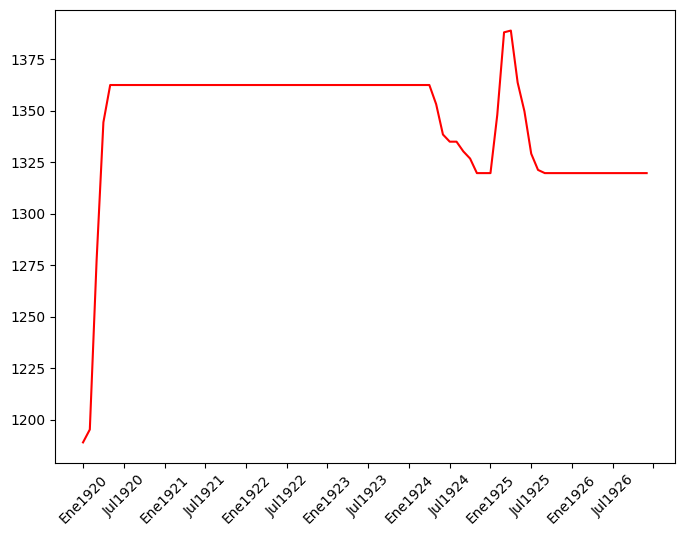

In [13]:
figure(figsize=(8, 6), dpi=100)

plt.plot(caja_corte['fecha'], caja_corte['Billetes en circulación - Total'], color='r')

plt.xticks(np.arange(0, len(caja_corte['fecha'])+1, 6))
plt.xticks(rotation=45)

plt.show()

# tipo de cambio

In [15]:
tc_paridad = [227] * len(tc_corte)

tc_corte['fecha'] = tc_corte['Mes'] + tc_corte['Año'].astype(str)

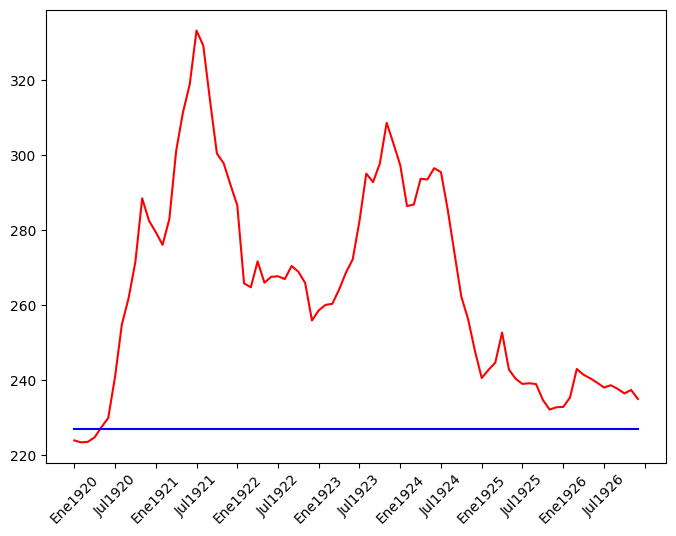

In [16]:
figure(figsize=(8, 6), dpi=100)

plt.plot(tc_corte['fecha'], tc_corte['Moneda Nacional de Oro - Ley 1.130'], color='r')
plt.plot(tc_corte['fecha'], tc_paridad, color='b')
plt.xticks(np.arange(0, len(tc_corte['fecha'])+1, 6))
plt.xticks(rotation=45)

plt.show()

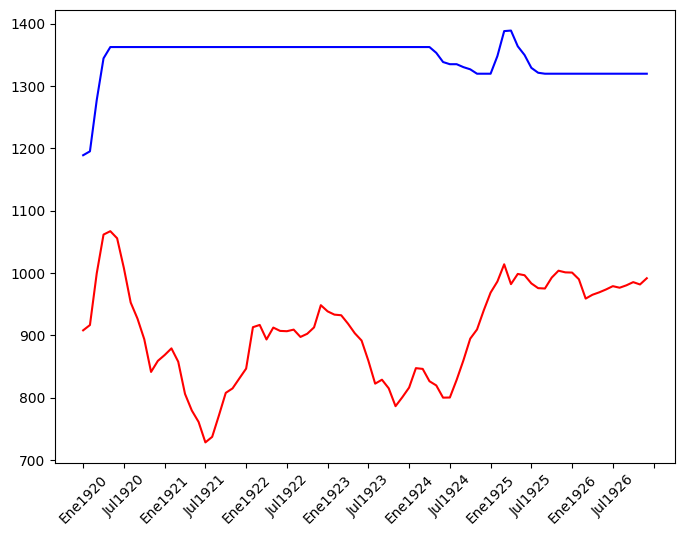

In [17]:
figure(figsize=(8, 6), dpi=100)

oro_pesos = caja_corte['Emisión por Canje de Oro. Ley 3.871 - Articulo 7º']+caja_corte['Emisión por Oro depositado en las Legaciones - Ley 9.480']
oro_oro = oro_pesos/tc_corte['Moneda Nacional de Oro - Ley 1.130']*tc_paridad


plt.plot(caja_corte['fecha'], oro_oro, color='r')
#plt.plot(caja_corte['fecha'], oro_pesos, color='r')
plt.plot(caja_corte['fecha'], caja_corte['Billetes en circulación - Total'], color='b')


plt.xticks(np.arange(0, len(caja_corte['fecha'])+1, 6))
plt.xticks(rotation=45)

plt.show()

# relaciones

In [20]:
# reservas
oro_pesos = caja_corte['Emisión por Canje de Oro. Ley 3.871 - Articulo 7º']+caja_corte['Emisión por Oro depositado en las Legaciones - Ley 9.480']
oro_oro = oro_pesos/tc_corte['Moneda Nacional de Oro - Ley 1.130']*100
reservas = oro_oro*tc_paridad

reservas_var = []
for i in range(len(reservas)-1):
    reservas_var.append(reservas.iloc[i+1]-reservas.iloc[i])
    
#activos internos
act_int = caja_corte['Emisión por Redescuento - Leyes 9.479 y 9.577']+caja_corte['Emisión por caución de titulos del emprestito patriótico - Ley 11.580']

act_int_var = []
for i in range(len(act_int)-1):
    act_int_var.append(act_int.iloc[i+1]-act_int.iloc[i])

    #billetes
billetes = caja_corte['Billetes en circulación - Total']
billetes_var = []
for i in range(len(billetes)-1):
    billetes_var.append(billetes.iloc[i+1]-billetes.iloc[i])


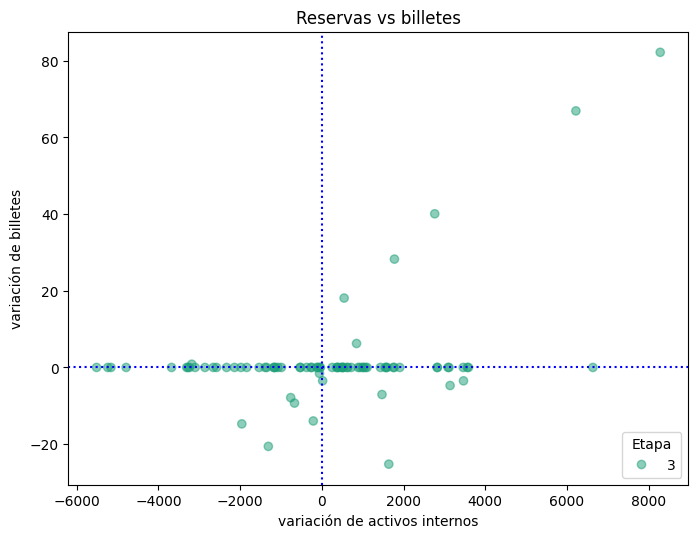

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure

#%matplotlib notebook
%matplotlib inline 
#desactivar opción interactiva

x = reservas_var
#x = act_int_var
y = billetes_var
año = caja_corte['etapa'].tolist()
del año[0]

figure(figsize=(8, 6), dpi=100)
scatter = plt.scatter(x, y, c=año, cmap = 'Dark2',alpha=0.5)

plt.axhline(y=0, color='b', linestyle=':') #línea fija horizontal
plt.axvline(x=0, color='b', linestyle=':') #línea fija vertical

plt.title('Reservas vs billetes')
plt.xlabel('variación de activos internos')
plt.ylabel('variación de billetes')
# produce a legend with the unique colors from the scatter

legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="Etapa")

plt.show()

# depósitos

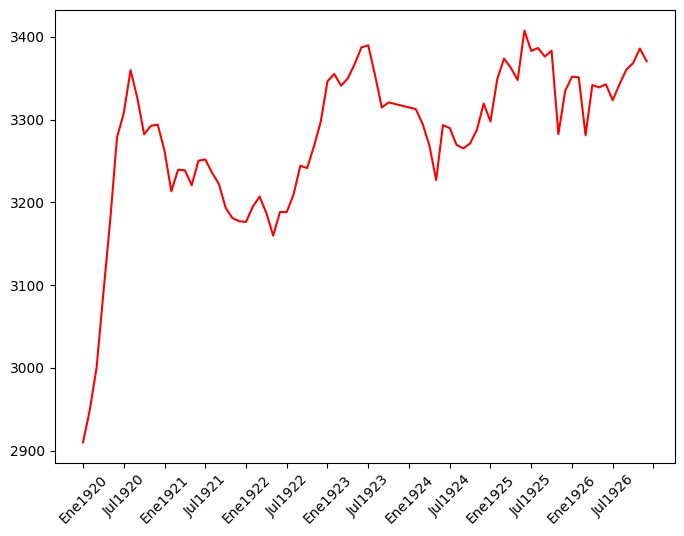

In [23]:
bancos_corte['fecha'] = bancos_corte['Mes'] + bancos_corte['Año'].astype(str)

figure(figsize=(8, 6), dpi=100)

plt.plot(bancos_corte['fecha'], bancos_corte['Depósitos - Total'], color='r')
plt.xticks(np.arange(0, len(bancos_corte['fecha'])+1, 6))
plt.xticks(rotation=45)

plt.show()

# resultado fiscal como % PIB

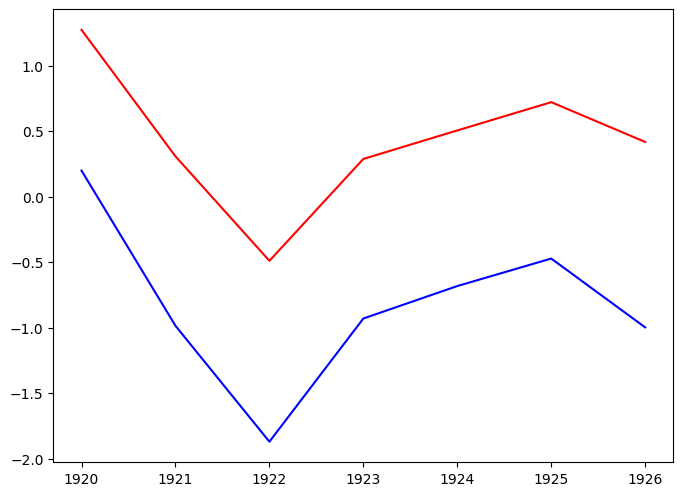

In [25]:
figure(figsize=(8, 6), dpi=100)

plt.plot(resultado_corte['Año'], resultado_corte['Resultado Primario'], color='r')
plt.plot(resultado_corte['Año'], resultado_corte['Resultado Financiero'], color='b')

plt.show()

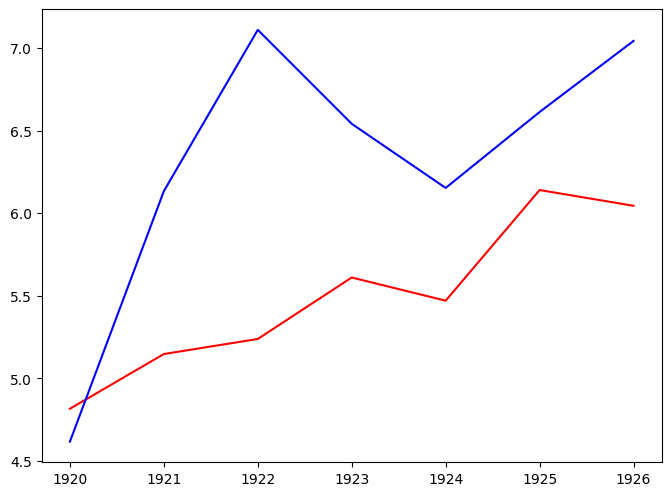

In [26]:
figure(figsize=(8, 6), dpi=100)

plt.plot(resultado_corte['Año'], resultado_corte['Ingresos Totales'], color='r')
plt.plot(resultado_corte['Año'], resultado_corte['Gastos Totales'], color='b')

plt.show()